In [9]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

from tqdm import tqdm
from copy import deepcopy

In [ ]:
new_train_dataset = pd.read_csv('new_train_dataset.csv').drop('Unnamed: 0', axis=1)
new_test_dataset = pd.read_csv('new_test_dataset.csv').drop('Unnamed: 0', axis=1)

In [48]:
cat_features_for_catboost = [feature for feature in new_train_dataset.columns if any([f in feature for f in cat_features]) and any([agg in feature.split(',')[1] for agg in ['max', 'min', 'count', 'set']])] + ['product']

In [84]:
new_train_dataset

,app_id,"('amnt', 'mean')_1","('amnt', 'max')_1","('amnt', 'min')_1","('amnt', 'count')_1","('amnt', 'std')_1","('amnt', 'median')_1","('amnt', 'sum')_1","('amnt', 'set')_1","('currency', 'mean')_1",...,"('hour_diff', 'mean')_3","('hour_diff', 'max')_3","('hour_diff', 'min')_3","('hour_diff', 'count')_3","('hour_diff', 'std')_3","('hour_diff', 'median')_3","('hour_diff', 'sum')_3","('hour_diff', 'set')_3",product,flag
0,1,0.315534,0.539584,0.155581,118.0,0.081449,0.297589,37.233018,76.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,1,0
1,5,0.413886,0.594620,0.269110,47.0,0.099990,0.431864,19.452643,40.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,1,0
2,6,0.405220,0.605813,0.321124,23.0,0.087880,0.349301,9.320063,15.0,8.217391,...,0.0,0,0,0,0.0,0.0,0.0,0,1,0
3,7,0.247137,0.476811,0.062575,27.0,0.120529,0.258414,6.672708,27.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
4,11,0.394930,0.516834,0.258972,16.0,0.052362,0.397758,6.318882,13.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,805124,0.305002,0.431275,0.178216,17.0,0.076090,0.283747,5.185040,15.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
377342,805125,0.336705,0.463473,0.212853,90.0,0.065424,0.322885,30.303451,78.0,1.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
377343,805127,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0,0,0,0.0,0.0,0.0,0,4,0
377344,805130,0.404151,0.563568,0.271747,51.0,0.064915,0.406097,20.611678,47.0,3.980392,...,0.0,0,0,0,0.0,0.0,0.0,0,1,0


In [44]:
new_test_dataset

,Unnamed: 0,app_id,"('amnt', 'mean')_1","('amnt', 'max')_1","('amnt', 'min')_1","('amnt', 'count')_1","('amnt', 'std')_1","('amnt', 'median')_1","('amnt', 'sum')_1","('amnt', 'set')_1",...,"('hour_diff', 'max')_3","('hour_diff', 'min')_3","('hour_diff', 'count')_3","('hour_diff', 'std')_3","('hour_diff', 'median')_3","('hour_diff', 'sum')_3","('hour_diff', 'set')_3",product,amnt_1 / amnt_2,amnt_1 - amnt_2
0,0,805133,0.357228,0.510922,0.271738,10.0,0.074707,0.340671,3.572283,9.0,...,0,0,0,0.0,0.0,0.0,0,1,1.583329,1.316198
1,1,805134,0.415484,0.657194,0.290811,10.0,0.137396,0.354344,4.154836,10.0,...,0,0,0,0.0,0.0,0.0,0,0,8.037465,3.638003
2,2,805135,0.383397,0.643157,0.000000,237.0,0.118584,0.388423,90.865022,190.0,...,0,0,0,0.0,0.0,0.0,0,1,30.319592,87.868214
3,3,805136,0.333396,0.560044,0.000000,27.0,0.102188,0.337863,9.001699,27.0,...,0,0,0,0.0,0.0,0.0,0,1,3.796999,6.631059
4,4,805137,0.358440,0.582099,0.196203,23.0,0.108278,0.339223,8.244126,21.0,...,0,0,0,0.0,0.0,0.0,0,2,82441.263544,8.244126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188669,188669,1003045,0.470013,0.507530,0.432496,2.0,0.053057,0.470013,0.940026,2.0,...,0,0,0,0.0,0.0,0.0,0,1,0.353306,-1.720529
188670,188670,1003047,0.381451,0.652660,0.000000,50.0,0.123121,0.407793,19.072534,44.0,...,0,0,0,0.0,0.0,0.0,0,0,15.869170,17.870773
188671,188671,1003048,0.397564,0.683797,0.225878,108.0,0.090983,0.387677,42.936907,95.0,...,0,0,0,0.0,0.0,0.0,0,1,17.801841,40.525071
188672,188672,1003049,0.478856,0.510295,0.345373,6.0,0.065640,0.505177,2.873139,5.0,...,0,0,0,0.0,0.0,0.0,0,0,28731.388131,2.873139


In [56]:
X_train, X_val, y_train, y_val = train_test_split(new_train_dataset.drop('flag', axis=1), new_train_dataset['flag'], test_size=0.15, random_state=42, shuffle=True, stratify=new_train_dataset['flag'])

In [49]:
X_train

,app_id,"('amnt', 'mean')_1","('amnt', 'max')_1","('amnt', 'min')_1","('amnt', 'count')_1","('amnt', 'std')_1","('amnt', 'median')_1","('amnt', 'sum')_1","('amnt', 'set')_1","('currency', 'mean')_1",...,"('weekofyear', 'set')_3","('hour_diff', 'mean')_3","('hour_diff', 'max')_3","('hour_diff', 'min')_3","('hour_diff', 'count')_3","('hour_diff', 'std')_3","('hour_diff', 'median')_3","('hour_diff', 'sum')_3","('hour_diff', 'set')_3",product
76230,163760,0.351589,0.578477,0.165224,59.0,0.103155,0.336204,20.743730,53.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,2
362400,773810,0.331747,0.730435,0.000000,346.0,0.079028,0.329756,114.784359,264.0,1.104046,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
229241,492771,0.384666,0.608252,0.218385,26.0,0.107740,0.365184,10.001323,26.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,4
9303,20311,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,2
87788,189034,0.414370,0.605432,0.220630,17.0,0.122955,0.359050,7.044286,16.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21845,46845,0.395353,0.488173,0.278992,20.0,0.068322,0.413920,7.907054,18.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,2
82298,177048,0.377614,0.539584,0.228806,52.0,0.064187,0.380352,19.635905,48.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,0
55694,118947,0.323434,0.477944,0.205577,56.0,0.066888,0.334416,18.112301,45.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,1
357138,762823,0.359075,0.531555,0.077790,82.0,0.090444,0.353978,29.444162,65.0,1.000000,...,0,0.0,0,0,0,0.0,0.0,0.0,0,1


In [50]:
y_train

76230     0
362400    1
229241    0
9303      0
87788     0
         ..
21845     0
82298     0
55694     0
357138    0
71276     0
Name: flag, Length: 289526, dtype: int64

In [88]:
cbc_model = CatBoostClassifier(iterations=250, learning_rate=0.1, depth=7, random_state=42, logging_level='Silent')

In [190]:
cbc_model = CatBoostClassifier(
    iterations=900,
    learning_rate=0.1,
    depth=5,
    l2_leaf_reg=7,
    scale_pos_weight=5,
    random_state=1,
    cat_features=cat_features_for_catboost,
    logging_level='Silent',
    task_type="GPU",
    devices='0:1'
)

cbc_model.fit(new_train_dataset.drop('flag', axis=1), new_train_dataset['flag'])
y_train_pred_cbc = cbc_model.predict(new_test_dataset.drop('flag', axis=1))
print(200 * roc_auc_score(new_test_dataset['flag'], cbc_model.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1]) - 100)
print(confusion_matrix(new_test_dataset['flag'], y_train_pred_cbc))
print(f1_score(new_test_dataset['flag'], y_train_pred_cbc))
print(roc_auc_score(new_test_dataset['flag'], y_train_pred_cbc))

52.51923048544634
[[180085   2650]
 [  5215    724]]
0.15548158488134864
0.5537020852449185


In [169]:
cbc_model_2 = CatBoostClassifier(
    iterations=900,
    learning_rate=0.1,
    depth=5,
    l2_leaf_reg=7,
    scale_pos_weight=5,
    random_state=1,
    cat_features=cat_features_for_catboost,
    logging_level='Silent',
    task_type="GPU",
    devices='0:1'
)

cbc_model_2.fit(new_train_dataset.drop('flag', axis=1), new_train_dataset['flag'])
y_train_pred_cbc = cbc_model_2.predict(new_test_dataset.drop('flag', axis=1))
print(200 * roc_auc_score(new_test_dataset['flag'], cbc_model_2.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1]) - 100)
print(confusion_matrix(new_test_dataset['flag'], y_train_pred_cbc))
print(f1_score(new_test_dataset['flag'], y_train_pred_cbc))
print(roc_auc_score(new_test_dataset['flag'], y_train_pred_cbc))

52.146501351126204
[[180228   2507]
 [  5255    684]]
0.1498357064622125
0.5507257919326876


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=5,
    colsample_bytree=0.6,
    random_state=42
)

xgb_model.fit(new_train_dataset.drop('flag', axis=1), new_train_dataset['flag'])
y_train_pred_xgb = xgb_model.predict(new_test_dataset.drop('flag', axis=1))
print(200 * roc_auc_score(new_test_dataset['flag'], xgb_model.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1]) - 100)
print(confusion_matrix(new_test_dataset['flag'], y_train_pred_xgb))
print(f1_score(new_test_dataset['flag'], y_train_pred_xgb))
print(roc_auc_score(new_test_dataset['flag'], y_train_pred_xgb))

In [60]:
model = CatBoostClassifier(
    eval_metric='NormalizedGini',
    scale_pos_weight=5,
    random_state=42,
    logging_level='Silent',
)

grid = {
    'iterations': [500],
    'learning_rate': [0.1],
    'depth': [5],
    'l2_leaf_reg': [7]
}

grid_search_result = model.grid_search(
    grid, 
    X=X_train, 
    y=y_train, 
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric NormalizedGini is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.5017500	best: 0.5017500 (0)	total: 1m 11s	remaining: 0us
Estimating final quality...


KeyboardInterrupt: 

In [194]:
y_test_pred = cbc_model.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1] * 0.8 + xgb_model.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1] * 0.3 + lgbm_model.predict_proba(new_test_dataset.drop('flag', axis=1))[:, 1] * 0.3

In [195]:
answer = pd.DataFrame({'app_id': new_test_dataset['app_id'].tolist(), 'flag': y_test_pred})
answer

,app_id,flag
0,805133,0.142163
1,805134,0.177929
2,805135,0.076391
3,805136,0.036299
4,805137,0.211622
...,...,...
188669,1003045,0.228817
188670,1003047,0.047226
188671,1003048,0.067409
188672,1003049,0.157470


In [196]:
answer.to_csv("result.csv", index=False)

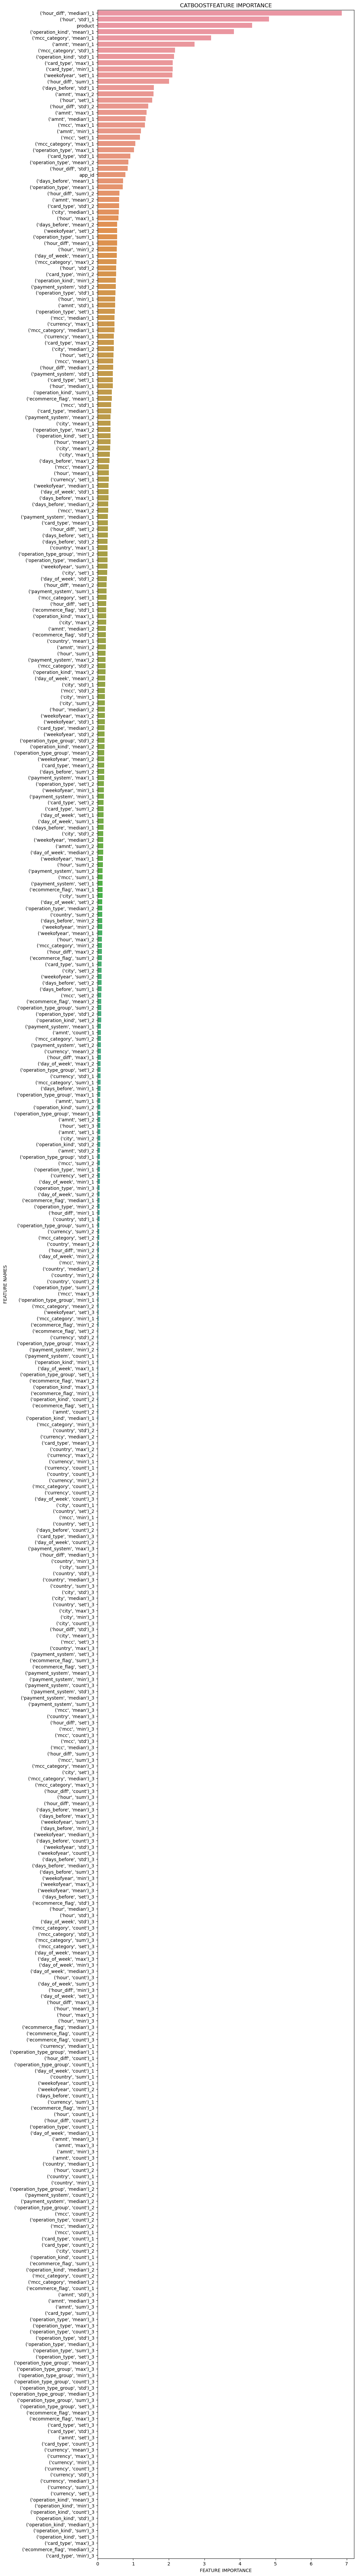

In [82]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    plt.figure(figsize=(10, 100))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(cbc_model_2.get_feature_importance(), X_train_1.columns,'CATBOOST')